<a href="https://colab.research.google.com/github/Leon-web-net/Machine_Learning/blob/Computer-Vision-%26-CNN/ComputerVision_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

* `torchvision`
* `torchvision.datasets` - get dstssets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torch.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.Dataloader` - Creates a Python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1.0 Getting a Dataset

Dataset used from the mnist dataset

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Whereto download
    train=True,  # do we want training or testing dataset
    download=True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None, # do we want to transform the targets we are predicting
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(), # samething
    target_transform=None,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15073729.63it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271188.60it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4821686.70it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20963375.72it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check the shape
print(f"Image shape: {image.shape} -> [C, H, W]")
print(f"Image label: {label}")

# Colour channel is only 1 because this dataset is in black and white (greyScale)


Image shape: torch.Size([1, 28, 28]) -> [C, H, W]
Image label: 9


### 1.1 Visualize Data

image shape torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

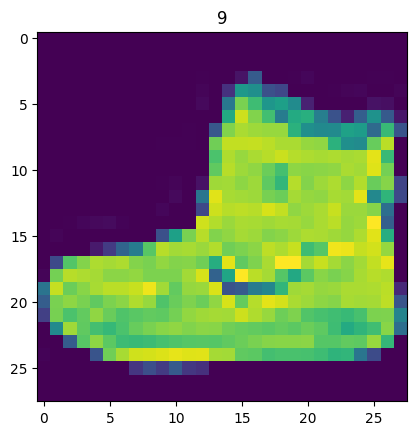

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

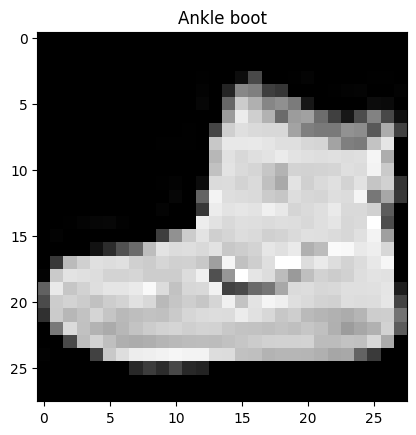

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

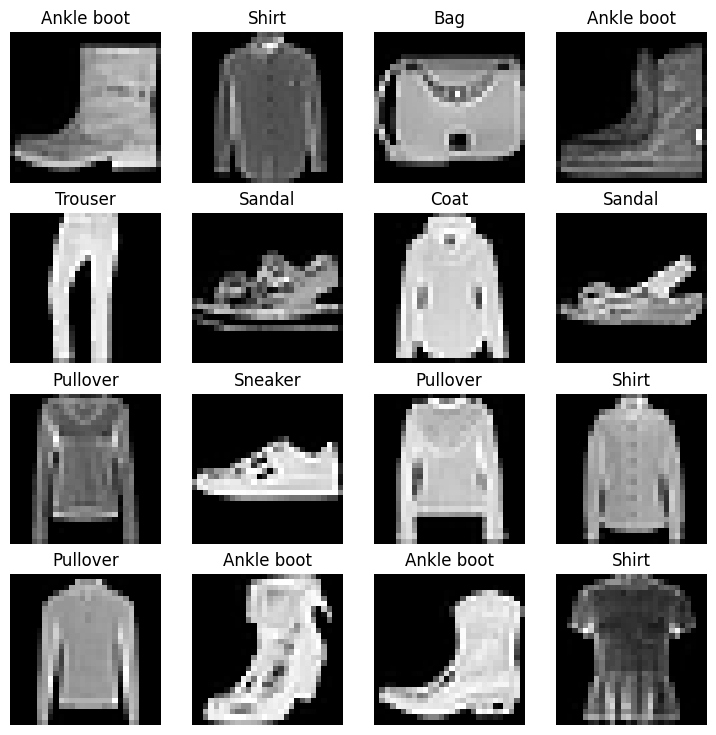

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  # print(f"Index: {i}, {random_idx}")
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

### 1.2 Prepare Dataloader

A dataloader turns our dataset into a python iterable.

More specifically we want to turn our data into mini batches.

Mini Batches:
1. Are more computationally efficient, as hardware may not be able to look (store in memory) at 60,000 images at the sam time.

2. It gives our neural network more chances to updateits gradients per epoch.


In [72]:
# Turn dataset into Dataloader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a223dd16f80>, <torch.utils.data.dataloader.DataLoader object at 0x7a223dd16aa0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check what is in th training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


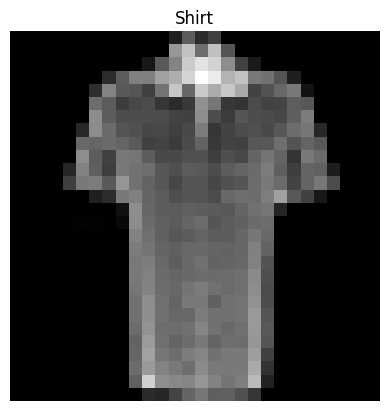

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 2.0 Model 0: Baseline Model

When starting to build a series of machine learning mdoelling experiments, it's best practice to start with a baseline model.

Baseline model is a simple model you will try and improve upon with subsequent models.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x= train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # perform forward pass

print(f"Before: {x.shape}, After: {output.shape}")

Before: torch.Size([1, 28, 28]), After: torch.Size([1, 784])


In [16]:
from torch import nn

class FashionMNISTModel_V0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units,),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

# Setupmodel with input parameters
model_0 = FashionMNISTModel_V0(
    input_shape= 28*28,
    hidden_units=10,
    output_shape=len(class_names),
).to("cpu")

model_0

FashionMNISTModel_V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).squeeze().shape

torch.Size([10])

### 2.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multiclass data, our loss function will be `nn.CrossEntropy()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - we will use accuracy as our classification method.

In [19]:
import requests
from pathlib import Path

# Download helper functions form Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skippig download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [20]:
# import accuracy metric
from helper_functions import accuracy_fn

# Setup Loss function and Optimizer
loss_fn = nn.CrossEntropyLoss()
LEARNING_RATE = 0.1
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=LEARNING_RATE)

### 2.2 Creating a function to time our experiments

Two main things to track:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [21]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  """ Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time to {device}: {total_time:.3f} seconds")
  return total_time

In [22]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time to cpu: 0.000 seconds


4.8628000001826877e-05

### 2.3 Creating a Training loop

1. Loop through epochs.
2. Loop through training batches, perfor training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it

In [23]:
str(next(model_0.parameters()).device)

'cpu'

In [24]:
# Import TQDM for progress bar (built-in)
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
# torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# create trianing and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### Training
  train_loss = 0
  # Add a loop to through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Print out what's happening

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss/= len(train_dataloader)

  ### Testing
  test_loss, test_acc= 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss+= loss_fn(test_pred, y_test)

      # 3. Calculate Accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss/= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc/= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5102, Test Acc: 82.0387
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4743 | Test loss: 0.5268, Test Acc: 81.6793
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4537 | Test loss: 0.5126, Test Acc: 82.9972
Train time to cpu: 27.499 seconds


## 3.0 Make predictions and get Model 0 results

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [26]:

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containin the results of model predictingg on data_loader."""
  loss, acc=0,0
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make our data device agnostic
      X,y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumuate the loss acc values per batch
      loss+= loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)
                         )

      # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__, # Only works when mode was created with a class
          "model_loss":loss.item(),
          "model_acc":acc,}



In [27]:
torch.manual_seed(42)

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 4.0 Setup device agnostic code

In [28]:
!nvidia-smi

Thu Mar 21 22:47:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [29]:
# setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 5.0 Model 1: Building a better model with non-linearity

In [30]:
from torch.ao.nn.qat.modules.linear import Linear
from torch.nn.modules.activation import ReLU
from torch import nn

class FashionMNISTModel_V1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int,):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        # nn.ReLU(),
        # nn.Linear(),
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

# Create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModel_V1(
    input_shape = 28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 5.1 Loss and Optimizer

In [31]:
# Setup loss, optimizer and evaluation metris
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # measeures how wrong our model is
LEARNING_RATE = 0.1
optimizer = torch.optim.SGD(params=model_1.parameters(), # updates model based on loss
                            lr=LEARNING_RATE)

### 5.2 Training and Testing loop

Create function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [32]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training loop with model trying to learn on data_loader."""
  train_loss, train_acc = 0,0
  model.to(device)
  # Put model into training mode
  model.train()

  # Add a loop to through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss/= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")




In [33]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device =device):
  """ Performs a testing loop step on model going over data_loader."""
  ### Testing
  test_loss, test_acc= 0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X_test,y_test in data_loader:
      # send data to target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model(X_test)

      # 2. Calculate loss and acc (accumulatively)
      test_loss+= loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics
    # Calculate the test loss and acc average per batch
    test_loss/= len(data_loader)
    test_acc/= len(data_loader)

    # Print out what's happening
    print(f"\nTest loss: {test_loss:.4f} Test Acc: {test_acc:.2f}%")


In [34]:
# Import TQDM for progress bar (built-in)
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create optimization and evaluation loop with train & test functions
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer= optimizer,
            accuracy_fn=accuracy_fn
             )

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            )


# Calculate training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end= train_time_end_on_gpu,
                                            device=device,)
total_train_time_model_0,total_train_time_model_1

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.64607 | Train acc: 77.17%

Test loss: 0.5394 Test Acc: 80.73%
Epoch: 1
-------
Train loss: 0.47965 | Train acc: 82.98%

Test loss: 0.5598 Test Acc: 80.30%
Epoch: 2
-------
Train loss: 0.44576 | Train acc: 84.19%

Test loss: 0.5003 Test Acc: 83.21%
Train time to cuda: 31.113 seconds


(27.498804844000006, 31.112858031999963)

In [35]:
model_0_results

{'model_name': 'FashionMNISTModel_V0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

**Note:** Sometimes, depending on data/hardware might train faster on CPU than GPU

Why?

1. It could be that overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. Hardware for CPU has better compute capability is better than GPU (rare).

In [36]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
                             )

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V1',
 'model_loss': 0.4999391436576843,
 'model_acc': 83.21685303514377}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModel_V0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 6.0 Model 2: Convolutional Neural Network (CNN)

Known for their cpabilities for finding patterns in visual data.

In [38]:
# create a convolutional neural network
class FashionMNISTModel_V2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """

  def __init__(self, input_shape:int, hidden_units:int, output_shape:int,):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # create a conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # value we set in NN's are hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,  # there's a trick to calculating this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"conv_block_1: {x.shape} ")
    x = self.conv_block_2(x)
    # print(f"conv-block_2: {x.shape}")
    x = self.classifier_layer(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x




In [39]:
image.shape

torch.Size([1, 28, 28])

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModel_V2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)

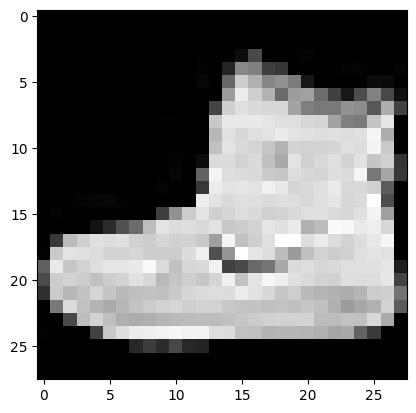

In [41]:
# model_2.state_dict()
plt.imshow(image.squeeze(), cmap="gray")

### 6.1 nn.Conv2D

In [42]:
torch.manual_seed(42)

# create a batch of images

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape:  {image.shape}")
print(f"Single image shape:  {test_image.shape}")
print(f"Test images: \n {test_image}")

Image batch shape:  torch.Size([1, 28, 28])
Single image shape:  torch.Size([3, 64, 64])
Test images: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [43]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0,)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0)) # don't need to unsqueeze past 1.11
conv_output.shape, test_image.unsqueeze(0).shape

(torch.Size([1, 10, 62, 62]), torch.Size([1, 3, 64, 64]))

### 6.2 Stepping through `nn.MaxPool2d()`

In [44]:
test_image.shape

torch.Size([3, 64, 64])

In [45]:
# Print out orginal image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2dlayer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_conv_maxPool = max_pool_layer(test_image_through_conv)
print(f"Shape after conv_layer() and max_pool_layer(): {test_image_conv_maxPool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [46]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimesnions to our images
random_tensor = torch.randn(size=(1,1,2,2))

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape:\n{random_tensor.shape}")

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape:\n {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape:
 torch.Size([1, 1, 1, 1])


### 6.3 Setup a loss function and optimiser for model_2

In [47]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [48]:
# model_2.state_dict()

### Training and Testing `model_2` using out training and test functions


In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

#Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):  # tdqm shows progress bar in iterations
  print(f"Epoch: {epoch} \n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn= loss_fn,
             optimizer=optimiser,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model= model_2,
             data_loader = test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Train loss: 0.59101 | Train acc: 78.60%

Test loss: 0.3916 Test Acc: 85.58%
Epoch: 1 
------
Train loss: 0.36112 | Train acc: 86.95%

Test loss: 0.3771 Test Acc: 87.02%
Epoch: 2 
------
Train loss: 0.32565 | Train acc: 88.31%

Test loss: 0.3482 Test Acc: 87.44%
Train time to cuda: 37.953 seconds


In [50]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device= device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.34767642617225647,
 'model_acc': 87.44009584664536}

In [51]:
 model_0_results

{'model_name': 'FashionMNISTModel_V0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## 7.0 Compare model results and training time

In [52]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel_V0,0.512530,83.007188
1,FashionMNISTModel_V1,0.499939,83.216853
2,FashionMNISTModel_V2,0.347676,87.440096


In [53]:
 # Add training time to results comparison
 compare_results["training_time"] = [
                              total_train_time_model_0,
                              total_train_time_model_1,
                              total_train_time_model_2
                                     ]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel_V0,0.512530,83.007188,27.498805
1,FashionMNISTModel_V1,0.499939,83.216853,31.112858
2,FashionMNISTModel_V2,0.347676,87.440096,37.953259


Text(0, 0.5, 'model')

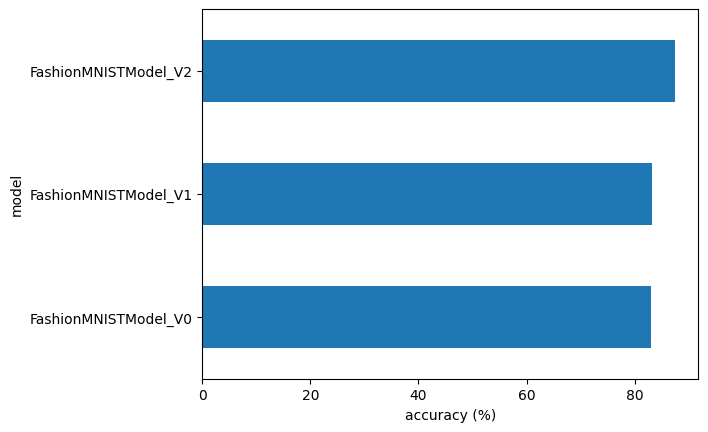

In [54]:
# Visualise model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 8.0 Make and evaluate random predictions with the best model

In [55]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:

      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)




In [56]:
img,label=test_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [57]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Coat')

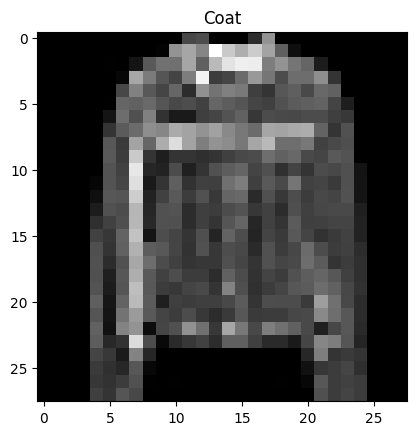

In [58]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [59]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              )

# View first two predictions probabilities
pred_probs[:2]


tensor([[5.1040e-03, 2.6426e-03, 6.6751e-01, 2.7653e-04, 2.7010e-01, 5.7622e-04,
         4.9961e-02, 1.9646e-04, 3.4696e-03, 1.6815e-04],
        [4.1268e-03, 1.7916e-03, 9.4878e-01, 7.4974e-05, 1.3717e-02, 1.1582e-05,
         3.0661e-02, 5.2840e-05, 7.2396e-04, 6.3819e-05]])

In [71]:
# Convert prediciton probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes,test_labels

(tensor([2, 2, 5, 5, 7, 2, 5, 3, 8]), [4, 2, 5, 5, 7, 2, 5, 3, 8])

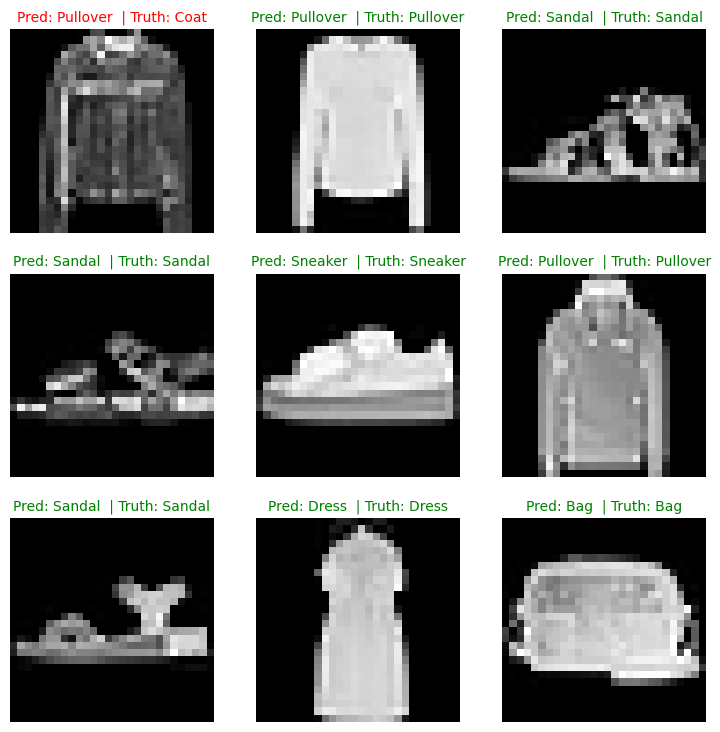

In [73]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):

  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find predictions label in text form
  pred_label = class_names[pred_classes[i]]

  # Get the truth label text form
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label}  | Truth: {truth_label}"

  # Checl for equality between pred and truth and change colour of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 9.0 Confusion Matrix for prediction evaluation
1. Make predicitons with out trained modek on the test dataset
2. Make confusion matrix using `torchmetrics.ConfusionMatrix`
3. Plot confusiion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [74]:
from tqdm.auto import tqdm

# 1. Make predictions
y_preds= []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predicitons..."):
    # Send data and targets to target device
    X,y = X.to(device),y.to(device)
    # Do forward pass
    y_logit = model_2(X)
    # Predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predcitions on cpu
    y_preds.append(y_pred.cpu())

# Concatenate list of predicitons into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predicitons...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [75]:
# Import torhcmetrics, mlxtend
try:
  import mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -U -q mlxtend
  print("Installing new version")


mlxtend version: 0.22.0


In [76]:
try:
  import torchmetrics
  print("Imported torchmetrics")
except:
  print("Installing torchmetrics")
  !pip install -q torchmetrics==0.8.0


Imported torchmetrics


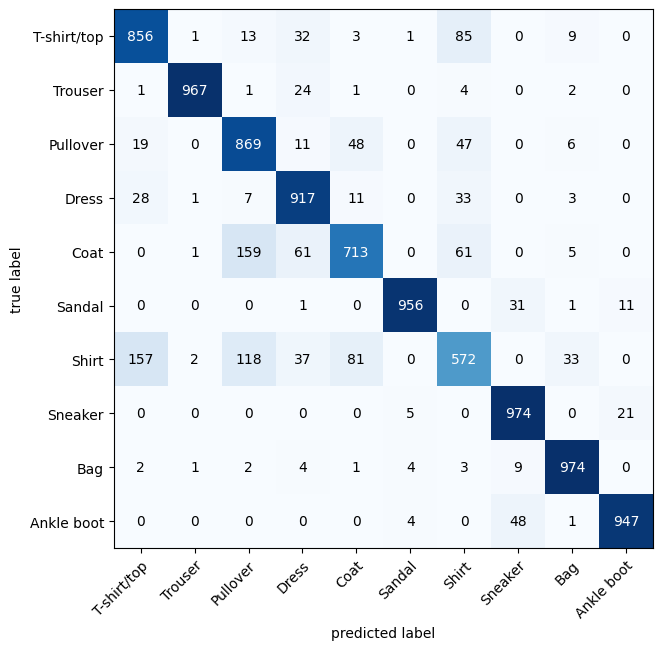

In [77]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predicitons to targets

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3.

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10, 7)
)


In [78]:
confmat_tensor

tensor([[856,   1,  13,  32,   3,   1,  85,   0,   9,   0],
        [  1, 967,   1,  24,   1,   0,   4,   0,   2,   0],
        [ 19,   0, 869,  11,  48,   0,  47,   0,   6,   0],
        [ 28,   1,   7, 917,  11,   0,  33,   0,   3,   0],
        [  0,   1, 159,  61, 713,   0,  61,   0,   5,   0],
        [  0,   0,   0,   1,   0, 956,   0,  31,   1,  11],
        [157,   2, 118,  37,  81,   0, 572,   0,  33,   0],
        [  0,   0,   0,   0,   0,   5,   0, 974,   0,  21],
        [  2,   1,   2,   4,   1,   4,   3,   9, 974,   0],
        [  0,   0,   0,   0,   0,   4,   0,  48,   1, 947]])

## 11.0 Save and load best perforoming model

In [82]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

# Create model save
MODEL_NAME = "Computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# Save model state dict (model parameters, weights, bias etc)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/Computer_vision_model_2.pth


In [85]:
# Creat a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModel_V2(input_shape=1,
                                      hidden_units=10,
                                      output_shape=len(class_names))

# Load state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# To target device
loaded_model_2.to(device)

FashionMNISTModel_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [86]:
model_2_results

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.34767642617225647,
 'model_acc': 87.44009584664536}

In [92]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model= loaded_model_2,
    data_loader= test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)


  0%|          | 0/313 [00:00<?, ?it/s]

In [95]:
loaded_model_2_results

{'model_name': 'FashionMNISTModel_V2',
 'model_loss': 0.34752973914146423,
 'model_acc': 87.46006389776358}

In [97]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol= 1e-03)

tensor(True)